Ideally should follow the Golden ratio principle But this isn't ideal

![Golden Ratio principle](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e9/GoldenSpiralLogarithmic_color_in.gif/220px-GoldenSpiralLogarithmic_color_in.gif)

Loaded file data/00000.tif
(7888, 8096, 3)


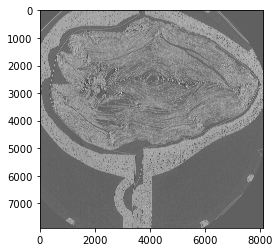

In [1]:
#Process and save output
#!ls tiles
import cv2
import random
#file = random.choice(files)
path = "data/00000.tif"#to_dir+file
print("Loaded file",path)
image = cv2.imread(path)
print(image.shape)
original_image_size = image.shape
import matplotlib.pyplot as plt
plt.imshow(image[:,:,:])

#Tiles are of 7888, 8096, 3 shape

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from PIL import Image

def draw_square(radius,center_x,center_y):
    #radius = 1000
    # Calculate the position of the dot on the circumference
    angle = 5*np.pi / 4  # Adjust the angle as needed
    dot_x = center_x + int(radius * np.cos(angle))
    dot_y = center_y + int(radius * np.sin(angle))

    # Define the parameters for the square
    square_side_length = int(np.sqrt(2*radius**2)) #get hypotenus
    square_x = dot_x#4068#width // 2 - square_side_length // 2
    square_y = dot_y#2500#height // 2 - square_side_length // 2

    # Create a rectangle patch
    rect = patches.Rectangle((square_x, square_y), square_side_length, square_side_length, linewidth=1, edgecolor='r', facecolor='none')
    # Add the rectangle to the plot
    #ax.add_patch(rect)
    print("Radius : ",radius,"Rectangle : ",rect)
    return rect

def draw_square_using_centre(radius):
    # Define the parameters for the square
    square_side_length = int(np.sqrt(2*radius**2)) #get hypotenus
    square_x = width // 2 - square_side_length // 2
    square_y = height // 2 - square_side_length // 2

    # Create a rectangle patch
    rect = patches.Rectangle((square_x, square_y), square_side_length, square_side_length, linewidth=1, edgecolor='r', facecolor='none')
    # Add the rectangle to the plot
    #ax.add_patch(rect)
    print("Radius : ",radius,"Rectangle : ",rect)
    return rect

def draw_rectangles_centre(radius,center_x,center_y):
    # Create a rectangle patch
    rect = patches.Rectangle((square_x, square_y), square_side_length, square_side_length, linewidth=1, edgecolor='r', facecolor='none')
    # Add the rectangle to the plot
    #ax.add_patch(rect)
    print("Radius : ",radius,"Rectangle : ",rect)
    return rect
def draw_rectangles_corners(left, upper, right, lower):
    x = left
    y = upper
    width = right - left
    height = lower - upper
    # Create a rectangle patch
    rect = patches.Rectangle((x,y), width, height, linewidth=1, edgecolor='r', facecolor='none')
    # Add the rectangle to the plot
    #ax.add_patch(rect)
    print("Rectangle : ",rect)
    return rect

def crop_out_rectangle(left, upper, right, lower,image):
    '''
    To automatically crop out a rectangle
    '''
    # Crop the image #(left, upper, right, lower)-tuple.
    cropped_image_1 = image.crop((left, upper, right, lower))
    return cropped_image_1

Automate making the squares

In [3]:
# Open the image
image = Image.open(path)
img_array = np.array(image)

# Get the dimensions of the image
height, width = img_array.shape

# Create a figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img_array)
center_x=4068
center_y=2500
radii = [1000]
for r in radii :
    rect = draw_square(radius=r,center_x=center_x,center_y=center_y)
    ax.add_patch(rect)

# Display the image with the square
plt.show()

Radius :  1000 Rectangle :  Rectangle(xy=(3361, 1793), width=1414, height=1414, angle=0)


In [4]:
# Define the coordinates for the rectangular section
left = rect.get_x()
upper = rect.get_y()
right = left + rect.get_width()
lower = upper+rect.get_height()

# Crop the image
cropped_image = image.crop((left, upper, right, lower))

# Save the cropped image
#cropped_image.save('cropped_image.png')

# Display the cropped image
#cropped_image.show()
fig, ax = plt.subplots()

# Display the image
ax.imshow(cropped_image)

1st segment

In [5]:
# img_array = cropped_image

# # Get the dimensions of the image
# height, width = img_array.size

# # Create a figure and axes
# fig, ax = plt.subplots()

# # Display the image
# ax.imshow(img_array)
# radii = [100,250,400,500]
# rects_dict = {}
# for r in radii :
#     rect = draw_square_using_centre(radius=r)#,center_x=center_x,center_y=center_y)
#     rects_dict[r]=rect
#     ax.add_patch(rect)
# plt.show()

In [6]:
# rects_dict

# Obtaining sections A, B, C, D here

In [7]:
img_array = cropped_image
# Get the dimensions of the image
height, width = img_array.size
rects_dict = {}
radii = [100,250]
def set_plotting_parameters(radii):
    for r in radii :
        rect = draw_square_using_centre(radius=r)#,center_x=center_x,center_y=center_y)
        #ax.add_patch(rect)
        rects_dict[r]=rect
    rect = rects_dict[radii[1]];rect1 = rects_dict[radii[0]];
    left = rect.get_x(); upper = rect.get_y() ; right = left + rect.get_width() ; lower = upper+rect.get_height()
    left1 = rect1.get_x(); upper1 = rect1.get_y(); right1 = left1 + rect1.get_width(); lower1 = upper1+rect1.get_height()
    return left,upper, right, lower,left1,upper1, right1, lower1

#Set parameters for section A,B,C,D
left,upper, right, lower,left1,upper1, right1, lower1 = set_plotting_parameters(radii)

def crop_out_segment(left, upper, right, lower,img_pil):
    # Crop the image
    cropped_image_1 = img_pil.crop((left, upper, right, lower))
    return cropped_image_1


def dot_and_crop_rectangle_plot(left, upper, right, lower,img_array):
    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img_array)
    ax[0].plot(left, upper, 'bo')
    ax[0].plot(left,lower, 'ro')
    ax[0].plot(right, upper, 'go')
    ax[0].plot(right,lower, 'wo')
    ax[0].set_title('Original with rectangle')
    ax[0].axis('off')

    # Plot the second image #left, upper, right, lower
    ax[1].imshow(crop_out_segment(left, upper, right, lower,img_array))
    ax[1].set_title('Cropped')
    ax[1].axis('off')

    # Display the subplots
    plt.show()

Radius :  100 Rectangle :  Rectangle(xy=(637, 637), width=141, height=141, angle=0)
Radius :  250 Rectangle :  Rectangle(xy=(531, 531), width=353, height=353, angle=0)


### 1st section A

In [8]:
# '''
# To get section A, crop out and plot
# '''
# dot_and_crop_rectangle_plot(left, lower1, right1, lower,img_array)

### then section B

In [9]:
# dot_and_crop_rectangle_plot(right1, upper1, right, lower,img_array)

### then section C

In [10]:
# dot_and_crop_rectangle_plot(left1, upper, right, upper1,img_array)

### then section D

In [11]:
# dot_and_crop_rectangle_plot(left, upper, left1, lower1,img_array)

Show A, B, C, D on cropped image

Rectangle :  Rectangle(xy=(531, 778), width=247, height=106, angle=0)
Rectangle :  Rectangle(xy=(778, 637), width=106, height=247, angle=0)
Rectangle :  Rectangle(xy=(637, 531), width=247, height=106, angle=0)
Rectangle :  Rectangle(xy=(531, 531), width=106, height=247, angle=0)


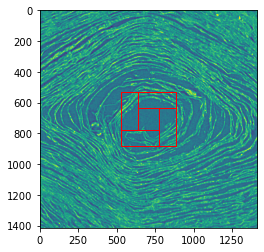

In [12]:
# Create a figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img_array)
rect = draw_rectangles_corners(left, lower1, right1, lower) #A
ax.add_patch(rect)
A = crop_out_rectangle(left, lower1, right1, lower ,img_array)

rect = draw_rectangles_corners(right1, upper1, right, lower) #B
ax.add_patch(rect)
B = crop_out_rectangle(right1, upper1, right, lower ,img_array)

rect = draw_rectangles_corners(left1, upper, right, upper1) #C
ax.add_patch(rect)
C = crop_out_rectangle(left1, upper, right, upper1 ,img_array)

rect = draw_rectangles_corners(left, upper, left1, lower1) #D
ax.add_patch(rect)
D = crop_out_rectangle(left, upper, left1, lower1 ,img_array)
plt.show()

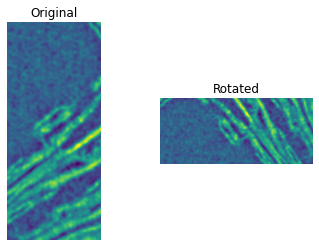

In [13]:
# Create subplots
fig, axes = plt.subplots(1, 2)

# Plot the first image
axes[0].imshow(B)
axes[0].set_title('Original')
axes[0].axis('off')

# Plot the second image
axes[1].imshow(np.rot90(B, 1))
axes[1].set_title('Rotated')
axes[1].axis('off')

# Display the subplots
plt.show()

In [14]:
# Open the images
images = [A,B,C,D,np.rot90(A, 4),np.rot90(B, 1),np.rot90(C, 2),np.rot90(D, 3)]

# Create a figure with 2 rows and 4 columns
fig, axs = plt.subplots(2, 4)

# Flatten the axis array
axs = axs.flatten()

# Loop over each image and plot it
for i, image in enumerate(images):
    axs[i].imshow(image)
    axs[i].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# Combine the images

In [15]:
from PIL import Image

# # Open the images
# image1 = np.rot90(A, 4)
# image2 = np.rot90(B, 1)
# image3 = np.rot90(C, 2)
# image4 = np.rot90(D, 3)

# Combine images horizontally
combined_image_array = np.concatenate((images[4:]), axis=1)

# Display the combined image
Image.fromarray(combined_image_array)

# Save combined image

(106, 988)


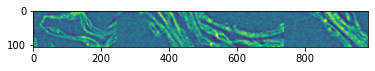

In [16]:
print(combined_image_array.shape)
plt.imshow(combined_image_array)
# Convert the array to an image
your_data_image = Image.fromarray(combined_image_array)

# Save the new TIF file
your_data_image.save("combined_image_00000_segment_1.tif")

# Good Start
As per now I have combined 4 segments, I will require make a combination for the whole cropped sub segment which should lead to about 16-20 segments (maintain the width of 106.
# Now do the same for 400 radius


In [17]:
img_array = cropped_image

# Get the dimensions of the image
height, width = img_array.size

# Create a figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(img_array)
radii = [100,250,400,550,700,850,1000]
rects_dict = {}
for r in radii :
    rect = draw_square_using_centre(radius=r)#,center_x=center_x,center_y=center_y)
    rects_dict[r]=rect
    ax.add_patch(rect)

# Display the image with the squares
plt.show()



Radius :  100 Rectangle :  Rectangle(xy=(637, 637), width=141, height=141, angle=0)
Radius :  250 Rectangle :  Rectangle(xy=(531, 531), width=353, height=353, angle=0)
Radius :  400 Rectangle :  Rectangle(xy=(425, 425), width=565, height=565, angle=0)
Radius :  550 Rectangle :  Rectangle(xy=(319, 319), width=777, height=777, angle=0)
Radius :  700 Rectangle :  Rectangle(xy=(213, 213), width=989, height=989, angle=0)
Radius :  850 Rectangle :  Rectangle(xy=(106, 106), width=1202, height=1202, angle=0)
Radius :  1000 Rectangle :  Rectangle(xy=(0, 0), width=1414, height=1414, angle=0)


# Obtaining sections E,F,G,H here

## Set parameters

# Set Parameters and Obtain sections E, F, G, H

In [18]:
# dot_and_crop_rectangle_plot(left, upper1, left1, lower,img_array)
# %matplotlib inline
# dot_and_crop_rectangle_plot(left1, lower1, right, lower,img_array)
# %matplotlib inline
# dot_and_crop_rectangle_plot(right1, upper, right, lower1,img_array)
# %matplotlib inline
# dot_and_crop_rectangle_plot(left, upper, right1, upper1,img_array)
# %matplotlib inline

# Show E, F, G, H on cropped image

Radius :  550 Rectangle :  Rectangle(xy=(319, 319), width=777, height=777, angle=0)
Radius :  700 Rectangle :  Rectangle(xy=(213, 213), width=989, height=989, angle=0)
Rectangle :  Rectangle(xy=(213, 319), width=106, height=883, angle=0)
Rectangle :  Rectangle(xy=(319, 1096), width=883, height=106, angle=0)
Rectangle :  Rectangle(xy=(1096, 213), width=106, height=883, angle=0)
Rectangle :  Rectangle(xy=(213, 213), width=883, height=106, angle=0)


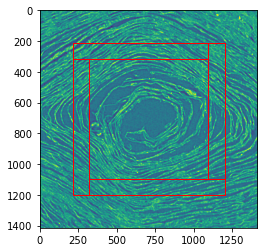

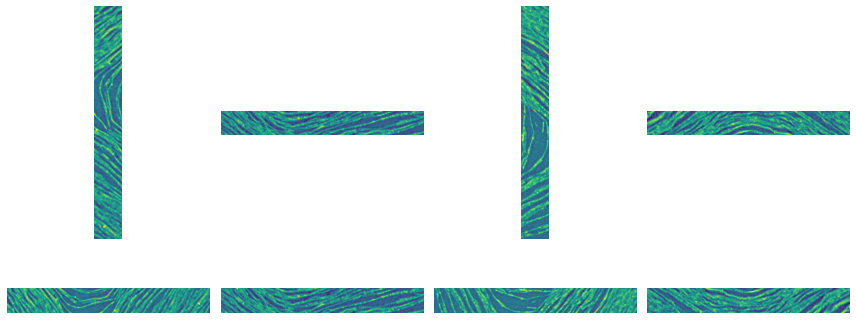

In [28]:
radii = [[550,700],[700,850],[850,1000]]

#[250,400],[[400,550]

def segment_images_to_concatenate(radii):
    left,upper, right, lower,left1,upper1, right1, lower1 = set_plotting_parameters(radii)
    # Create a figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(img_array)
    rect = draw_rectangles_corners(left, upper1, left1, lower) #E
    ax.add_patch(rect)
    E = crop_out_rectangle(left, upper1, left1, lower ,img_array)

    rect = draw_rectangles_corners(left1, lower1, right, lower) #F
    ax.add_patch(rect)
    F = crop_out_rectangle(left1, lower1, right, lower ,img_array)

    rect = draw_rectangles_corners(right1, upper, right, lower1) #G
    ax.add_patch(rect)
    G = crop_out_rectangle(right1, upper, right, lower1 ,img_array)

    rect = draw_rectangles_corners(left, upper, right1, upper1) #H
    ax.add_patch(rect)
    H = crop_out_rectangle(left, upper, right1, upper1 ,img_array)
    #%matplotlib inline
    plt.show()
    %matplotlib inline


    # Open the images
    images = [E,F,G,H,np.rot90(E, 1),np.rot90(F, 4),np.rot90(G, 3),np.rot90(H, 2)]
    concatenate = [np.rot90(E, 1),np.rot90(F, 4),np.rot90(G, 3),np.rot90(H, 2)]
    return images, concatenate
concatenate = []
for radiuses in radii:
    images, concatenate_1 = segment_images_to_concatenate(radiuses) #is radiuses a real word?
    concatenate += concatenate_1
    break
    
# Create a figure with 2 rows and 4 columns
fig, axs = plt.subplots(2, 4, figsize=(12, 6))

# Flatten the axis array
axs = axs.flatten()

# Loop over each image and plot it
for i, image in enumerate(images):
    axs[i].imshow(image)
    #%matplotlib inline
    axs[i].axis('off')
    #%matplotlib inline

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
#%matplotlib inline

In [20]:
# # Open the images
# images = [E,F,G,H,np.rot90(E, 1),np.rot90(F, 4),np.rot90(G, 3),np.rot90(H, 2)]

# # Create a figure with 2 rows and 4 columns
# fig, axs = plt.subplots(2, 4, figsize=(12, 6))

# # Flatten the axis array
# axs = axs.flatten()

# # Loop over each image and plot it
# for i, image in enumerate(images):
#     axs[i].imshow(image)
#     axs[i].axis('off')

# # Adjust layout and display the plot
# plt.tight_layout()
# plt.show()
for i in range(len(concatenate)):
    print(concatenate[i].shape)
    concatenate[i] = concatenate[i][:106]
    print(concatenate[i].shape,'\n')

(106, 459)
(106, 459) 

(106, 459)
(106, 459) 

(106, 459)
(106, 459) 

(106, 459)
(106, 459) 

(106, 671)
(106, 671) 

(106, 671)
(106, 671) 

(106, 671)
(106, 671) 

(106, 671)
(106, 671) 

(106, 883)
(106, 883) 

(106, 883)
(106, 883) 

(106, 883)
(106, 883) 

(106, 883)
(106, 883) 

(107, 1095)
(106, 1095) 

(106, 1095)
(106, 1095) 

(106, 1096)
(106, 1096) 

(107, 1096)
(106, 1096) 

(106, 1308)
(106, 1308) 

(106, 1308)
(106, 1308) 

(106, 1308)
(106, 1308) 

(106, 1308)
(106, 1308) 



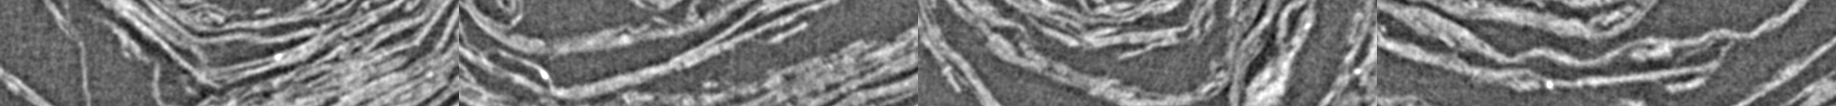

In [25]:
# # Open the images
# image1 = np.rot90(E, 1)#Image.open("/kaggle/input/dsail-porini/DSAIL-Porini Annotated camera trap images of wildlife species from a conservancy in Kenya/OpenMV_images/snapshot_201910831124667.jpg")
# image2 = np.rot90(F, 4)#Image.open("/kaggle/input/dsail-porini/DSAIL-Porini Annotated camera trap images of wildlife species from a conservancy in Kenya/OpenMV_images/snapshot_201910831124667.jpg")
# image3 = np.rot90(G, 3)#Image.open("/kaggle/input/dsail-porini/DSAIL-Porini Annotated camera trap images of wildlife species from a conservancy in Kenya/OpenMV_images/snapshot_201910831124667.jpg")
# image4 = np.rot90(H, 2)#Image.open("/kaggle/input/dsail-porini/DSAIL-Porini Annotated camera trap images of wildlife species from a conservancy in Kenya/OpenMV_images/snapshot_201910831124667.jpg")

# Combine images horizontally
combined_image_array_1 = np.concatenate((concatenate), axis=1)

# Display the combined image
Image.fromarray(combined_image_array_1)

# Save combined image

(106, 17666)


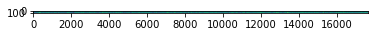

In [22]:
print(combined_image_array_1.shape)
plt.imshow(combined_image_array_1)
# Convert the array to an image
your_data_image = Image.fromarray(combined_image_array_1)

# Save the new TIF file
your_data_image.save("combined_image_00000_segment_2.tif")

# Combine segment 0 and 1

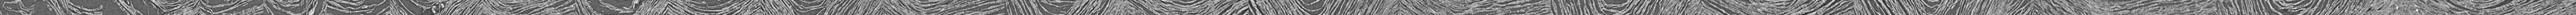

In [23]:
# Combine images horizontally
combined_image_array_0_and_1 = np.concatenate((combined_image_array,combined_image_array_1), axis=1)

# Display the combined image
Image.fromarray(combined_image_array_0_and_1)

(106, 18654)


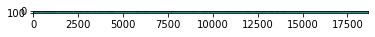

In [24]:
print(combined_image_array_0_and_1.shape)
plt.imshow(combined_image_array_0_and_1)
# Convert the array to an image
your_data_image = Image.fromarray(combined_image_array_0_and_1)

# Save the new TIF file
your_data_image.save("combined_image_00000_segment_1_and_2.tif")

# Better :)
This is better it seems possible to segment the scroll in this manner (it isn't perfect but should give at least some letters) Skewering will be very important

May have to use elipses but for now let's get an MVP

# Done mostly automating this process
seems like step 1 (for segment 1) is fixed and step 2 is more automatable